In [210]:
#Sentiment Analysis of Amazon Baby products reviews
import pandas as pd
import numpy as np
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
df = pd.read_csv("D:/archive_2/1429_1.csv")


In [211]:
df.head(10)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
5,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This amazon fire 8 inch tablet is the perfect ...,Just what we expected,NaN,NaN,tklit
6,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,"Great for e-reading on the go, nice and light ...",great e-reader tablet,NaN,NaN,Droi
7,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,"I gave this as a Christmas gift to my inlaws, ...",Great for gifts,NaN,NaN,Kacy
8,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",

In [212]:
#Sampling-As the data was biased towards higher ratings we include more data with lower ratings to make it balanced.
df2 = pd.read_csv("D:/Coursera Machine Learning Lab/third_data_amazon/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
df3 = pd.read_csv("D:/Coursera Machine Learning Lab/third_data_amazon/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

In [213]:
data = df[["id","reviews.text","reviews.rating"]]

In [214]:
data2 = df2[["id","reviews.text","reviews.rating"]]
data3 = df3[["id","reviews.text","reviews.rating"]]

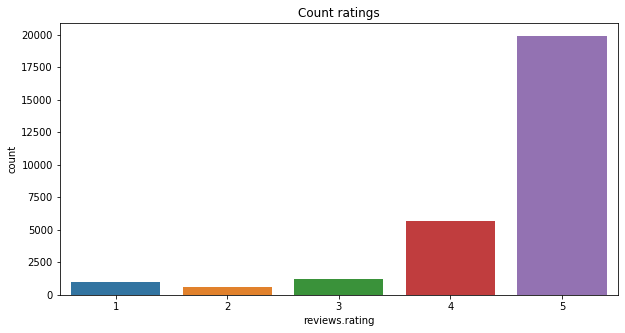

In [215]:
plt.figure(figsize=(10,5))
sns.countplot(data2['reviews.rating'])
plt.title('Count ratings')
plt.show()

In [216]:
data2 = data2[data2["reviews.rating"]<=3]
data3 = data3[data3["reviews.rating"]<=3]

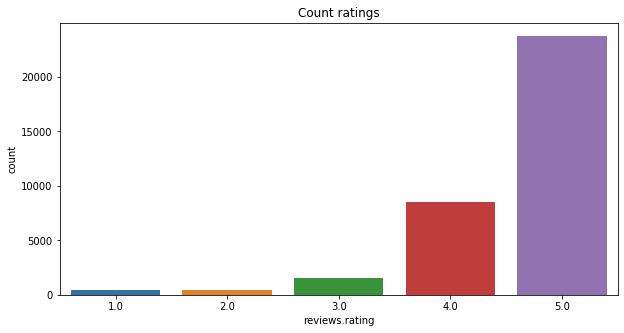

In [217]:
plt.figure(figsize=(10,5))
sns.countplot(data['reviews.rating'])
plt.title('Count ratings')
plt.show()

In [218]:
frames = [data, data2, data3]
products= pd.concat(frames)

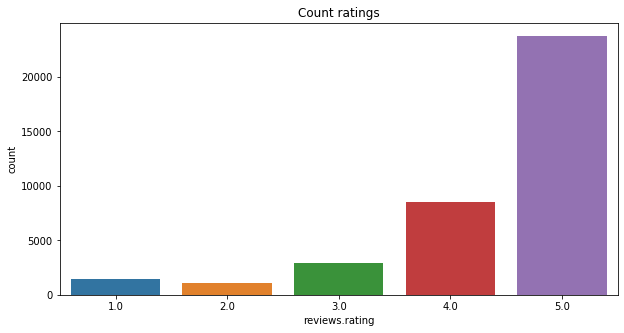

In [219]:
plt.figure(figsize=(10,5))
sns.countplot(products['reviews.rating'])
plt.title('Count ratings')
plt.show()

In [220]:
products.head()

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0


In [221]:
#check null values  
print(products['reviews.rating'].isnull().sum())

33


In [109]:
print(products['reviews.text'].isnull().sum())

1


In [110]:
print(products['id'].isnull().sum())

0


In [222]:
products=products.dropna()

In [223]:
len(products)

37727

In [224]:
for i in range(0,len(products)-1):
    if type(products.iloc[i]['reviews.text']) != str:
        
        products.iloc[i]['reviews.text'] = str(products.iloc[i]['reviews.text'])

In [225]:
products.head()

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0


In [226]:
def sentiment(n):
    if n >= 4:
        return 1
    else:
        return 0
products['sentiment'] = products['reviews.rating'].apply(sentiment)
products.head()

,id,reviews.text,reviews.rating,sentiment
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0,1
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0,1
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0,1
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0,1
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0,1


In [227]:

len(products[products["sentiment"]==1]),len(products[products["sentiment"]==0])
#check bias towards positive reviwes#
#tackling bias#

(32315, 5412)

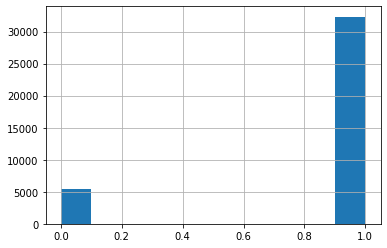

In [228]:
products.sentiment.hist()

In [231]:
#preprocesing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
products["reviews.text"]=products["reviews.text"].str.lower() 

#tokenization 
products['reviews.text'] = products.apply(lambda row: word_tokenize(row['reviews.text']), axis=1) 




In [232]:
products['reviews.text']

0       [this, product, so, far, has, not, disappointe...
1       [great, for, beginner, or, experienced, person...
2       [inexpensive, tablet, for, him, to, use, and, ...
3       [i, 've, had, my, fire, hd, 8, two, weeks, now...
4       [i, bought, this, for, my, grand, daughter, wh...
                              ...                        
4904    [the, battery, is, having, more, and, more, tr...
4945    [my, daughter, has, had, this, tablet, for, al...
4953    [very, cheap, and, was, not, impressed, at, al...
4971    [hard, to, use, ,, lots, of, ads, ,, and, rand...
4975    [i, wish, it, has, some, more, of, the, apps, ...
Name: reviews.text, Length: 37727, dtype: object

In [233]:
products["reviews.text"] = products['reviews.text'].apply(lambda x: [item for item in x if item.isalpha()]) 

#lemmatazing words
products['reviews.text'] = products['reviews.text'].apply(lambda x : [WordNetLemmatizer().lemmatize(y) for y in x])

#removing useless words
stop = stopwords.words('english')
products['reviews.text'] = products['reviews.text'].apply(lambda x: [item for item in x if item not in stop])

In [234]:
products["reviews.text"] = products["reviews.text"].apply(lambda x: str(' '.join(x))) 

In [235]:
products.head()

,id,reviews.text,reviews.rating,sentiment
0,AVqkIhwDv8e3D1O-lebb,product far ha disappointed child love use lik...,5.0,1
1,AVqkIhwDv8e3D1O-lebb,great beginner experienced person bought gift ...,5.0,1
2,AVqkIhwDv8e3D1O-lebb,inexpensive tablet use learn step nabi wa thri...,5.0,1
3,AVqkIhwDv8e3D1O-lebb,fire hd two week love tablet great prime membe...,4.0,1
4,AVqkIhwDv8e3D1O-lebb,bought grand daughter come visit set user ente...,5.0,1


In [236]:
X=products['reviews.text']
Y=products['sentiment']

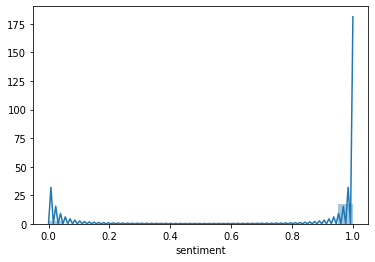

In [237]:
import seaborn as sns
sns.distplot(products['sentiment'],bins=20)

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [239]:
print(len(X_train))
print(len(y_train))

28295
28295


In [240]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
c = cv.fit_transform(X_train)    
X_test_m = cv.transform(X_test)

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(c, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [242]:
pred_y = model.predict(X_test_m)  #on test data
y_pred_train = model.predict(c)  #on train data

In [243]:
print('Test accuracy', sum(y_test == pred_y)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_train)/len(y_train))

Test accuracy 0.9175148430873622
Train accuracy 0.9526064675737763


In [244]:
accuracy_score(y_test, pred_y)

0.9175148430873622

In [247]:
from sklearn.metrics import classification_report
print("Classification Report for training")
print(classification_report(y_train, y_pred_train))
print("Classification Report for testing")
print(classification_report(y_test, pred_y))

Classification Report for training
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      4043
           1       0.96      0.99      0.97     24252

    accuracy                           0.95     28295
   macro avg       0.94      0.86      0.89     28295
weighted avg       0.95      0.95      0.95     28295

Classification Report for testing
              precision    recall  f1-score   support

           0       0.78      0.60      0.68      1369
           1       0.94      0.97      0.95      8063

    accuracy                           0.92      9432
   macro avg       0.86      0.79      0.82      9432
weighted avg       0.91      0.92      0.91      9432



In [248]:
#Using random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(c, y_train)
y_pred = classifier.predict(X_test_m)  #predictions on test data
y_pred_tr = classifier.predict(c)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [249]:
print("Classification Report on training")
print(classification_report(y_train, y_pred_tr))
print("Classification Report for test")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4043
           1       1.00      1.00      1.00     24252

    accuracy                           1.00     28295
   macro avg       0.99      0.99      0.99     28295
weighted avg       1.00      1.00      1.00     28295

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.79      0.69      0.74      1369
           1       0.95      0.97      0.96      8063

    accuracy                           0.93      9432
   macro avg       0.87      0.83      0.85      9432
weighted avg       0.93      0.93      0.93      9432



In [251]:

print('random forest classifier accuracy',accuracy_score(y_test, y_pred))

random forest classifier accuracy 0.9285411365564037


In [ ]:
#5-fold cross validation for parameter tuning to further boost the f1 score of test data.

In [252]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators": [10,50,100,200],
             "criterion":("gini","entropy")}
classifier = RandomForestClassifier()
clf = GridSearchCV(classifier, parameters, cv=5)
clf.fit(c, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [253]:
best_parameter = clf.best_params_
best_accuracy = clf.best_score_ #best cros validated mean
print('Best parameter: ' + str(best_parameter))
print('Best accuracy: ' + str(best_accuracy))

Best parameter: {'criterion': 'gini', 'n_estimators': 200}
Best accuracy: 0.9366672556988868


In [254]:
classifier = RandomForestClassifier(criterion = best_parameter["criterion"], 
                                    n_estimators = best_parameter["n_estimators"])
classifier.fit(c, y_train)
y_pred = classifier.predict(X_test_m)
y_pred_tr = classifier.predict(c)
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.9390373197625106
Train accuracy 0.9995052129351476


In [255]:
print("Classification Report for training after applying 5 fold cross validation ")
print(classification_report(y_train, y_pred_tr))
print("Classification Report on testing")
print(classification_report(y_test, y_pred))

Classification Report for training after applying 5 fold cross validation 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4043
           1       1.00      1.00      1.00     24252

    accuracy                           1.00     28295
   macro avg       1.00      1.00      1.00     28295
weighted avg       1.00      1.00      1.00     28295

Classification Report on testing
              precision    recall  f1-score   support

           0       0.89      0.66      0.76      1369
           1       0.94      0.99      0.97      8063

    accuracy                           0.94      9432
   macro avg       0.92      0.82      0.86      9432
weighted avg       0.94      0.94      0.94      9432



In [256]:

print('random forest classifier accuracy after 5 fold cross validation :)',accuracy_score(y_test, y_pred))

random forest classifier accuracy after 5 fold cross validation :) 0.9390373197625106
